In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5)
import funcs

import importlib
importlib.reload(funcs)

from matplotlib import rc
rc('font', size=12)
rc('font', family='Arial')
# rc('font', serif='Times')
rc('pdf', fonttype=42)

# Reconstruct tracks

In [15]:
df_cells, df_links = funcs.process_csv(vertices = 'FeatureAndTagTable-vertices.csv',
                edges = 'FeatureAndTagTable-edges.csv')

Loading vertices csv...
Restructuring cells dataframe...
Loading edges csv...
Restructuring links dataframe...
Appending track id to links...
Done.


Mean cell radius:  3.4366035043994807


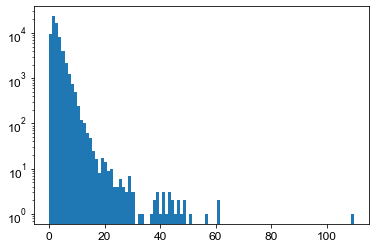

In [16]:
# check distribution of speeds from links

h, b, _ = plt.hist(df_links.speed, bins=100, log=True)
print('Mean cell radius: ', np.mean(df_cells.r))

In [17]:
df_links = funcs.remove_division_links(df_cells, df_links)
df_links = funcs.remove_big_jumps(df_links, thr=12)
df_cells = funcs.remove_unlinked_cells(df_cells, df_links)

Removing links for dividing cells...
Removing links for jumps bigger than 12
Removing disconnected cells (those that do not appear in links)...


In [18]:
tracks = funcs.reconstruct_tracks(df_links)
df_cells = funcs.append_track_id(df_cells, tracks)
df_cells = funcs.append_n_spots_track(df_cells)
df_cells = funcs.append_speed_tracks(df_cells, df_links)
df_cells = funcs.cleanup_cells_df(df_cells)

Reconstructing cell tracks...


100%|█████████████████████████████████████████████████████████████████████████████| 3237/3237 [00:12<00:00, 258.94it/s]


Creating cell_id column in cells dataframe...
Compute track length...
Compute track speed...
Cleanup


In [19]:
print(np.max(df_cells['mean-ch1']))
print(np.max(df_cells['mean-ch2']))

1589.943820224719
2446.7284345047924


In [22]:
print('Number of cells:', len(set(df_cells.cell_id)))
df_cells=funcs.set_channels_threshold(df_cells, lims_ch1=[25,900], lims_ch2=[5,2000])
print('Number of cells:', len(set(df_cells.cell_id)))

Number of cells: 3231


100%|████████████████████████████████████████████████████████████████████████████| 3231/3231 [00:02<00:00, 1394.79it/s]

Number of cells: 3227


In [23]:
print(np.max(df_cells['mean-ch1']))
print(np.max(df_cells['mean-ch2']))

899.7314148681055
1757.3363259668508


In [24]:
df_tracks = funcs.compute_track_info(df_cells)

Computing track info...


100%|█████████████████████████████████████████████████████████████████████████████| 3227/3227 [00:04<00:00, 655.57it/s]


In [25]:
df_cells

,cell_id,n_spots,r,x,y,z,t,speed,mean-ch1,mean-ch2
0,0,78,3.190012,262.259135,210.228479,106.3924,0,1.733141,136.867347,495.366071
1,0,78,3.609430,262.657840,210.052009,104.7150,1,2.101892,133.889892,617.633574
...,...,...,...,...,...,...,...,...,...,...
67736,3236,7,2.865227,295.477849,195.816160,57.7464,100,1.662542,143.128926,95.593388
67737,3236,7,2.291719,294.313977,195.078729,56.8160,101,NaN,132.020772,51.997033


In [26]:
df_tracks

,cell_id,len,start_t,end_t,speed,ch1,ch2,end2end,cumdist
0,0,78,0,77,2.399342,135.101545,351.469095,8.136973,184.749342
1,1,17,0,16,1.705058,132.368645,74.435380,9.466514,27.280933
...,...,...,...,...,...,...,...,...,...
3225,3235,5,45,49,4.645809,186.656633,90.218685,11.463428,18.583237
3226,3236,7,95,101,3.727075,134.994140,61.324911,12.606389,22.362450


### save

In [28]:
# del df_links, tracks

df_cells.to_csv('cells_no_div_no_jumps.csv')
df_tracks.to_csv('tracks_no_div_no_jumps.csv')

# df_cells.to_csv('cells_no_div.csv')
# df_tracks.to_csv('tracks_no_div.csv')

# Some plots: compare dataset with and without jumps

In [29]:
# df_cells = pd.read_csv('cells_no_div.csv', index_col=0)
# df_tracks = pd.read_csv('tracks_no_div.csv', index_col=0)

df_cells = pd.read_csv('cells_no_div_no_jumps.csv', index_col=0)
df_tracks = pd.read_csv('tracks_no_div_no_jumps.csv', index_col=0)

T_thr = [150,200]

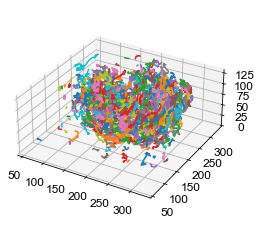

In [31]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

cells_id = list(set(df_cells.cell_id))
for cell_id in cells_id[:1000]:
    track = df_cells[df_cells.cell_id==cell_id][['x','y','z']].to_numpy()
    ax.plot3D(track[:,0],track[:,1],track[:,2])
    
xlims = (np.min(df_cells.x),np.max(df_cells.x))
ylims = (np.min(df_cells.y),np.max(df_cells.y))
zlims = (np.min(df_cells.z),np.max(df_cells.z))
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_zlim(zlims)
ax.set_box_aspect((xlims[1]-xlims[0],ylims[1]-ylims[0],zlims[1]-zlims[0]))

Text(0, 0.5, 'Speed (um/tp)')

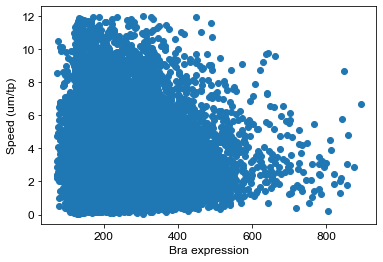

In [32]:
fig, ax = plt.subplots()
ax.plot(df_cells['mean-ch1'].values,df_cells.speed,'o')
ax.set_xlabel('Bra expression')
ax.set_ylabel('Speed (um/tp)')
# ax.set_ylim(0,20)
# ax.set_xlim(100,700)

C:\Users\anlas\AppData\Local\Temp/ipykernel_8216/905845062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cells['T_state'][df_cells['mean-ch1'].values>=T_thr[1]] = 'T+'
C:\Users\anlas\AppData\Local\Temp/ipykernel_8216/905845062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cells['T_state'][(df_cells['mean-ch1'].values>=T_thr[0])&(df_cells['mean-ch1'].values<T_thr[1])] = 'Tmid'
C:\Users\anlas\AppData\Local\Temp/ipykernel_8216/905845062.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

<AxesSubplot:xlabel='T_state', ylabel='speed'>

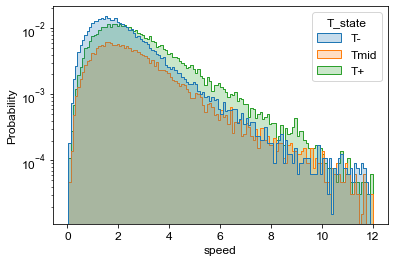

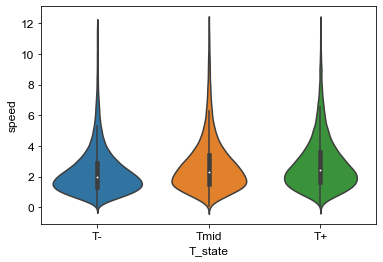

In [33]:
import seaborn as sns
# T_thr = [130, 160]

df_cells['T_state'] = ''
df_cells['T_state'][df_cells['mean-ch1'].values>=T_thr[1]] = 'T+'
df_cells['T_state'][(df_cells['mean-ch1'].values>=T_thr[0])&(df_cells['mean-ch1'].values<T_thr[1])] = 'Tmid'
df_cells['T_state'][df_cells['mean-ch1'].values<T_thr[0]] = 'T-'

plt.figure()
sns.histplot(df_cells, x="speed", hue="T_state", element="step", log_scale=(False,True), stat='probability')

plt.figure()
sns.violinplot(data=df_cells, x="T_state", y="speed")

#plt.figure()
#sns.barplot(data=df_cells, x="T_state", y="speed", errorbar='sd')

<IPython.core.display.Javascript object>


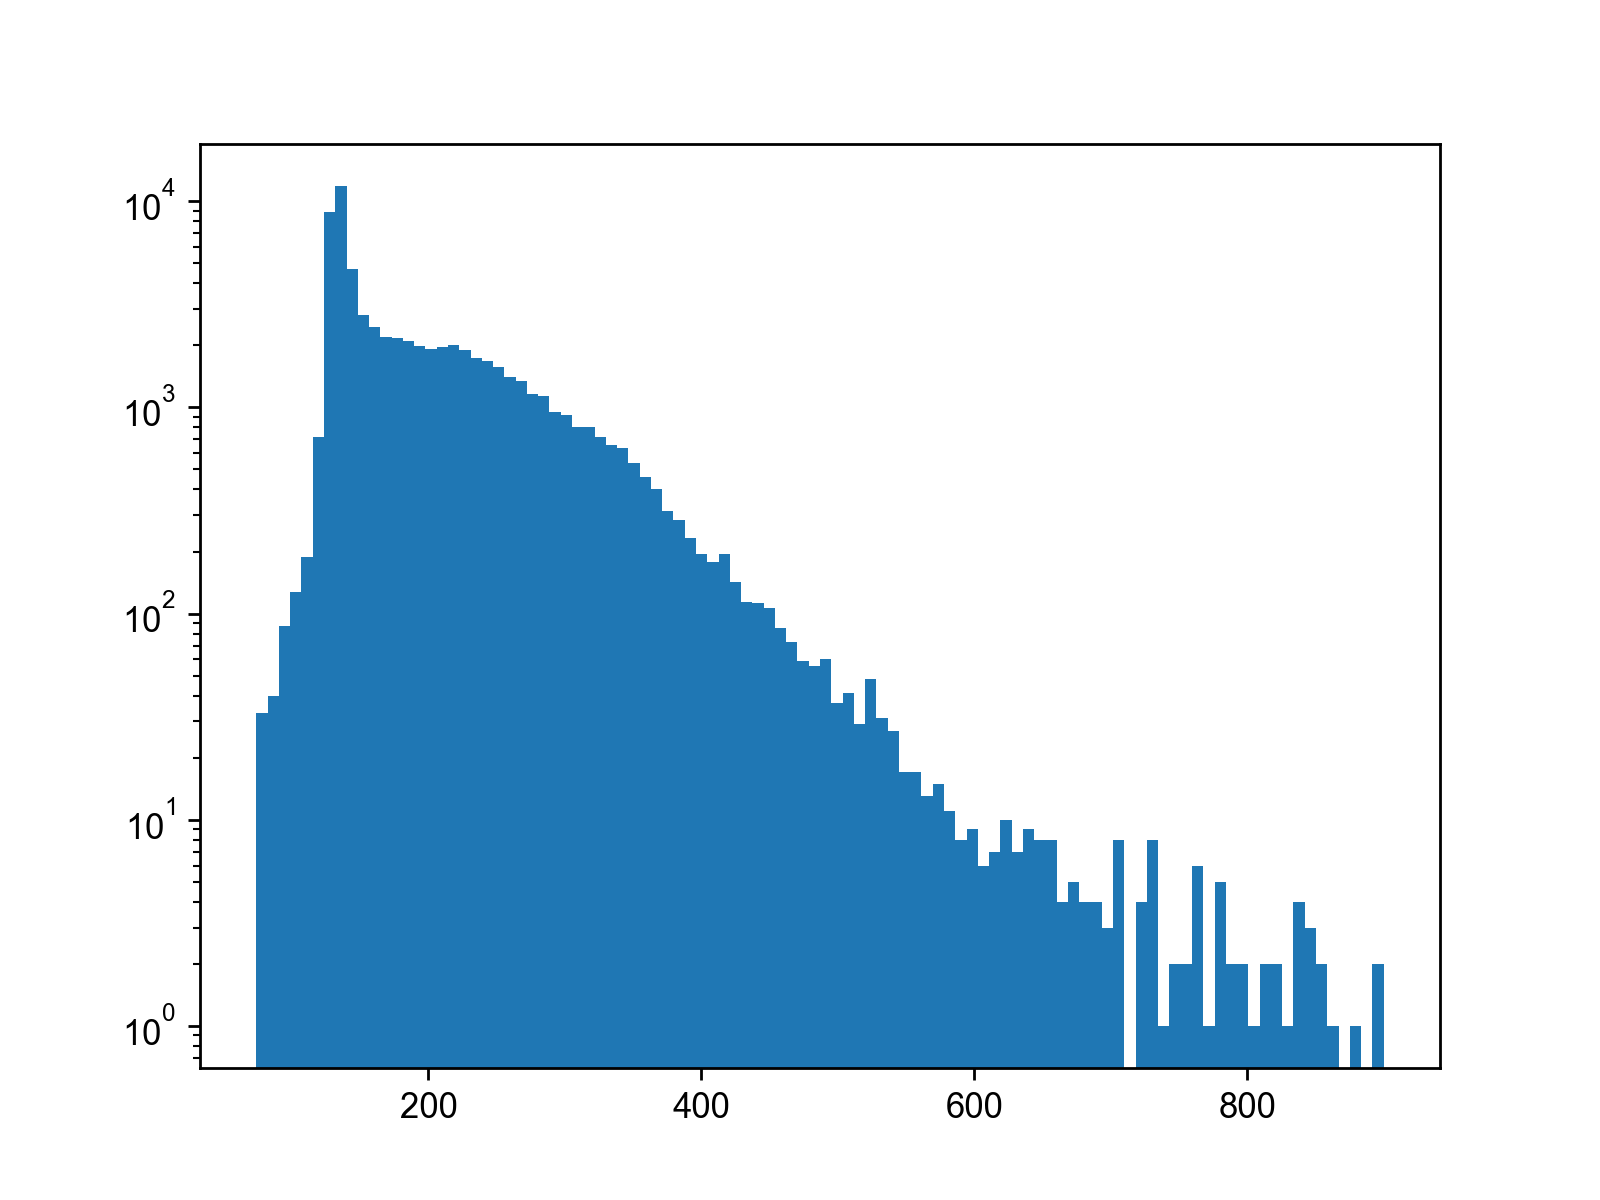

In [34]:
import matplotlib.pyplot as plt
%matplotlib notebook
h, b , _ = plt.hist(df_cells['mean-ch1'].values, bins=100, log=True)

<IPython.core.display.Javascript object>


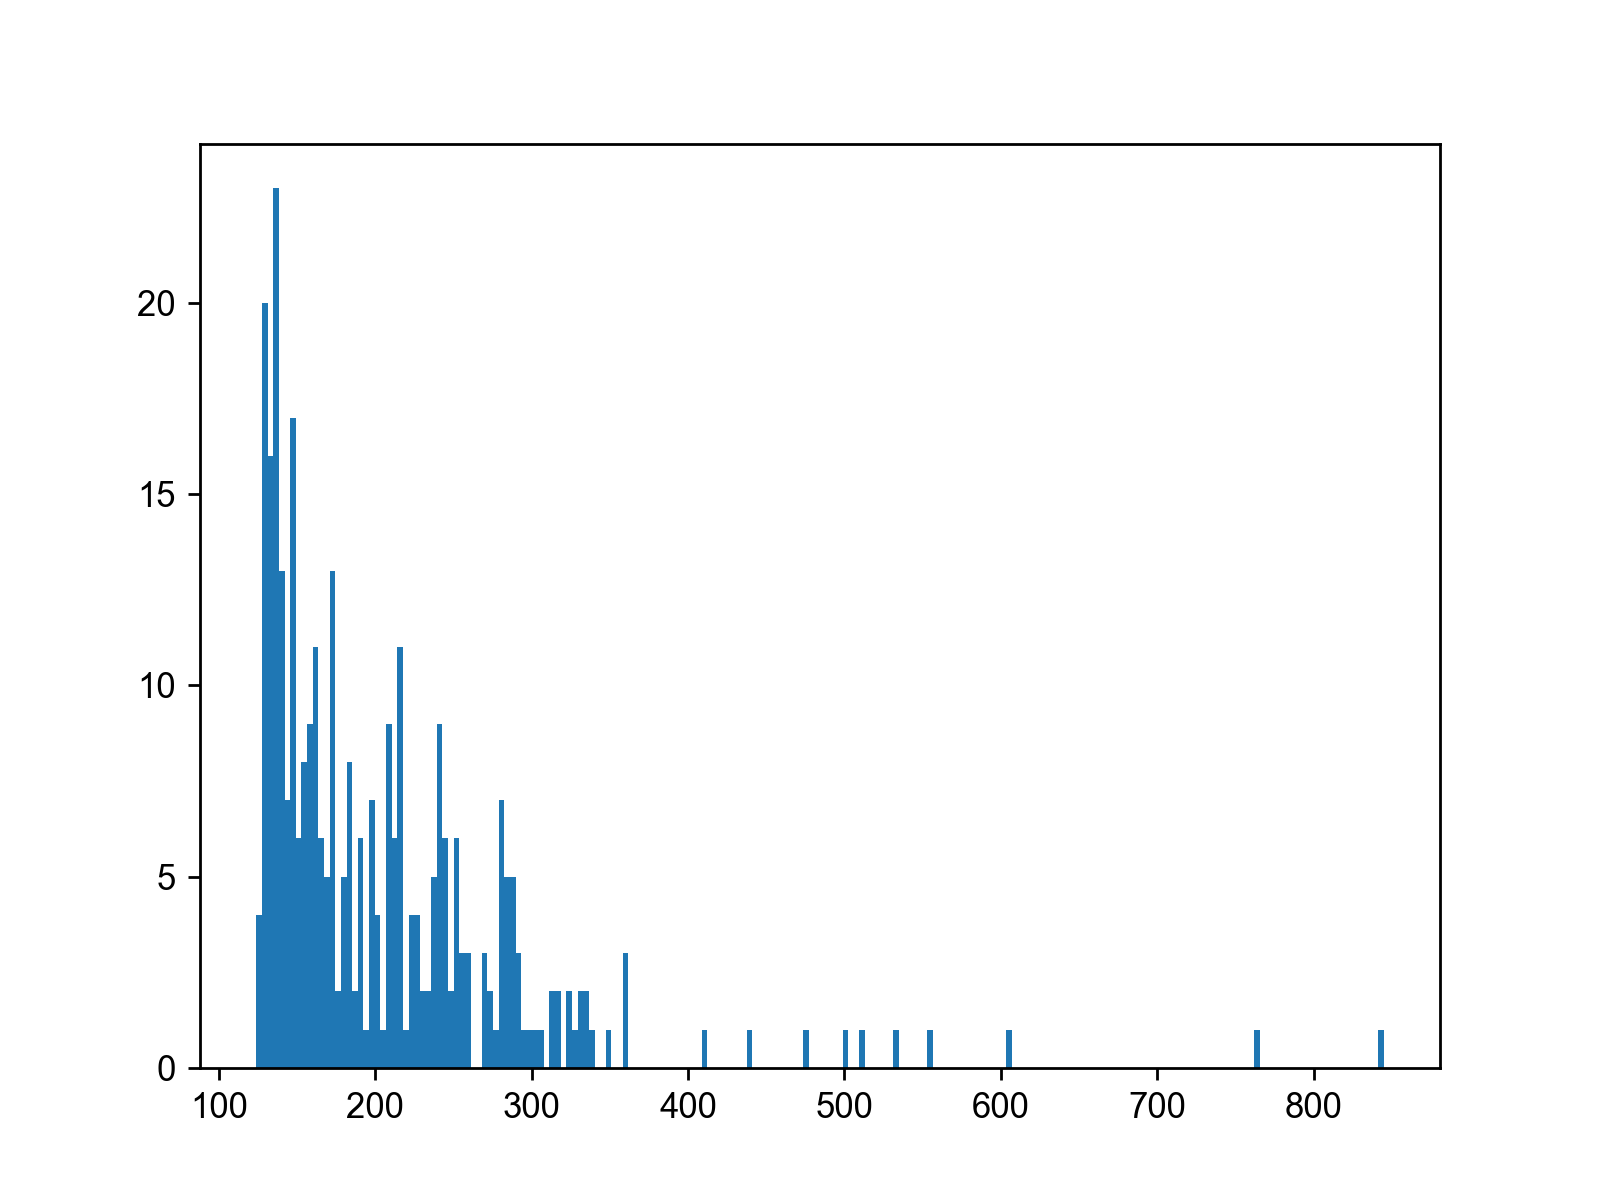

In [35]:
plt.figure()
h, b, _ = plt.hist(df_cells[df_cells.t==np.max(df_cells.t)]['mean-ch1'].values, bins=200)

## Plot for last timepoint

In [36]:
# T_thr = [130, 160]

# select only cells in last tp
df_lasttp = df_cells[df_cells.t==np.max(df_cells.t)]


cell_ids = df_lasttp.cell_id.values
T_vals = df_lasttp['mean-ch1'].values

track_Tpos = []
for T_val in T_vals:
    if T_val<T_thr[0]:
        track_Tpos.append('T-')
    if (T_val>=T_thr[0])&(T_val<T_thr[1]):
        track_Tpos.append('Tmid')
    if T_val>=T_thr[1]:
        track_Tpos.append('T+')


In [37]:
# find out cell index 
idxs = [list(df_tracks.cell_id.values).index(i) for i in cell_ids]

In [38]:
df_tracks_lasttp = df_tracks.iloc[idxs]

In [39]:
df_tracks_lasttp['T_state'] = track_Tpos

C:\Users\anlas\AppData\Local\Temp/ipykernel_8216/1426327704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tracks_lasttp['T_state'] = track_Tpos


In [40]:
df_tracks_lasttp = df_tracks_lasttp[df_tracks_lasttp.len>10]

<IPython.core.display.Javascript object>


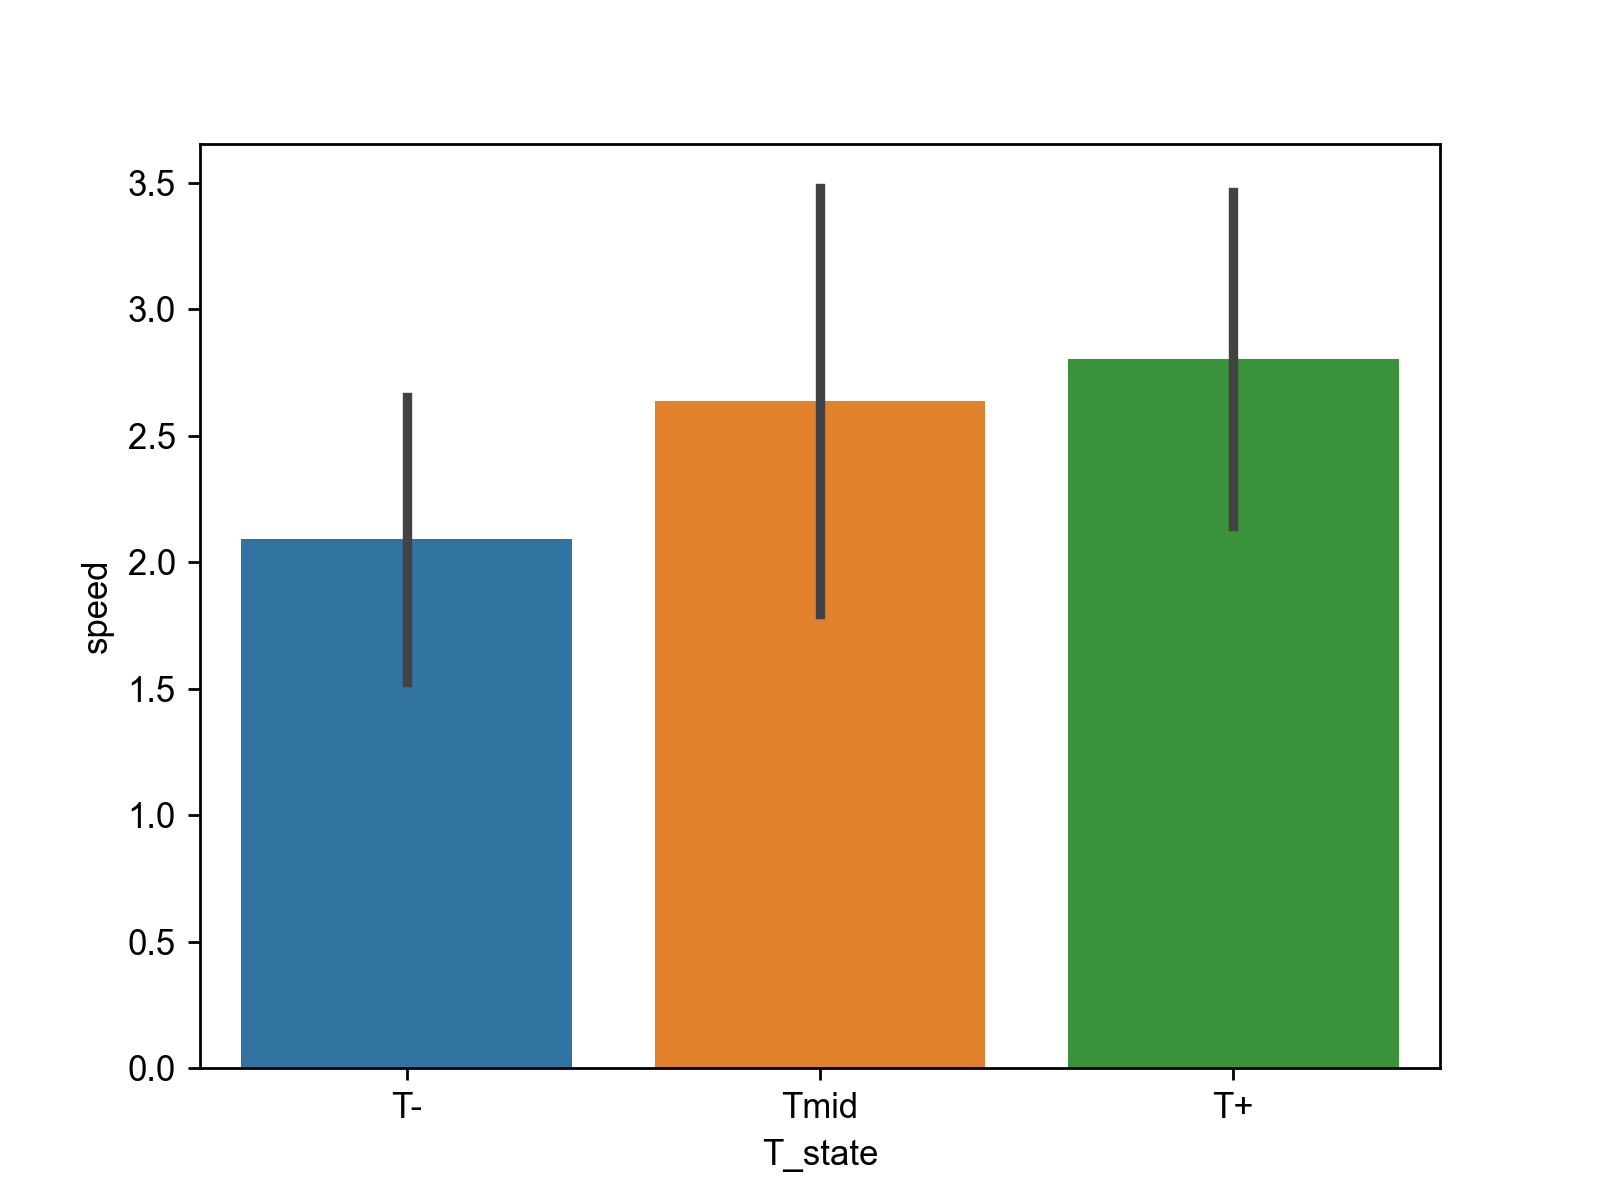

<AxesSubplot:xlabel='T_state', ylabel='speed'>

In [41]:
#200
plt.figure()
sns.barplot(data=df_tracks_lasttp, x='T_state', y='speed', ci='sd')

### Velocity plot at different time points

T_threshold=150

For each timepoint tp, use cells in the time windfow tp-10, tp+10, and filter out track shorter than 5 tp.

Then, compute which tracks are T positive and make the velocity plot, cumdist plot and end2end plot

In [42]:
# T_thr = [130, 160]
tps = np.linspace(0,200,11)
tps = [25,50,75,100]
track_length_thr = 5
time_window = 10

df_tracks_tps = pd.DataFrame({})

for tp in tqdm(tps):
    # filter cells around that tp
    df_tp_original = df_cells[(df_cells.t>(tp-time_window))&(df_cells.t<(tp+time_window))]
    track_ids_original = list(set(df_tp_original.cell_id.values))

    # remove short tracks
    df_tp = pd.DataFrame({})
    for track_id in track_ids_original:
        df_cell = df_tp_original[df_tp_original.cell_id==track_id]
        if len(df_cell)>track_length_thr:
            df_tp = pd.concat([df_tp,df_cell])
    df_tp = df_tp.reset_index(drop=True)
    
    # find out ids of remaining cells
    track_ids = list(set(df_tp.cell_id.values))

    # compute T positive/negative and mid cells
    T_vals = np.array([np.mean(df_tp[df_tp.cell_id==track_id]['mean-ch1'].values) for track_id in track_ids])
    track_Tpos = []
    for T_val in T_vals:
        if T_val<T_thr[0]:
            track_Tpos.append('T-')
        if (T_val>=T_thr[0])&(T_val<T_thr[1]):
            track_Tpos.append('Tmid')
        if T_val>=T_thr[1]:
            track_Tpos.append('T+')

    # compute mean velocity
    mean_vel = []
    for track_id in track_ids:
        pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
        mean_vel.append(np.mean(np.linalg.norm(np.diff(pos,axis=0),axis=1)))
        
    # compute cumdist
    cum_dist = []
    for track_id in track_ids:
        pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
        cum_dist.append(np.sum(np.linalg.norm(np.diff(pos,axis=0),axis=1))/pos.shape[0])
    
    # compute endo2end
    end2end = []
    for track_id in track_ids:
        pos = df_tp[df_tp.cell_id==track_id][['x','y','z']].to_numpy()
        end2end.append(np.linalg.norm(pos[0]-pos[-1])/pos.shape[0])
        
    df_tracks_tp = pd.DataFrame({
        'tp': tp,
        'cell_id': track_ids,
        'T_state': track_Tpos,
        'speed': mean_vel,
        'cumdist': cum_dist,
        'end2end': end2end,
    })
    
    df_tracks_tps = pd.concat([df_tracks_tps, df_tracks_tp])
    
df_tracks_tps = df_tracks_tps.reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.66s/it]


<IPython.core.display.Javascript object>


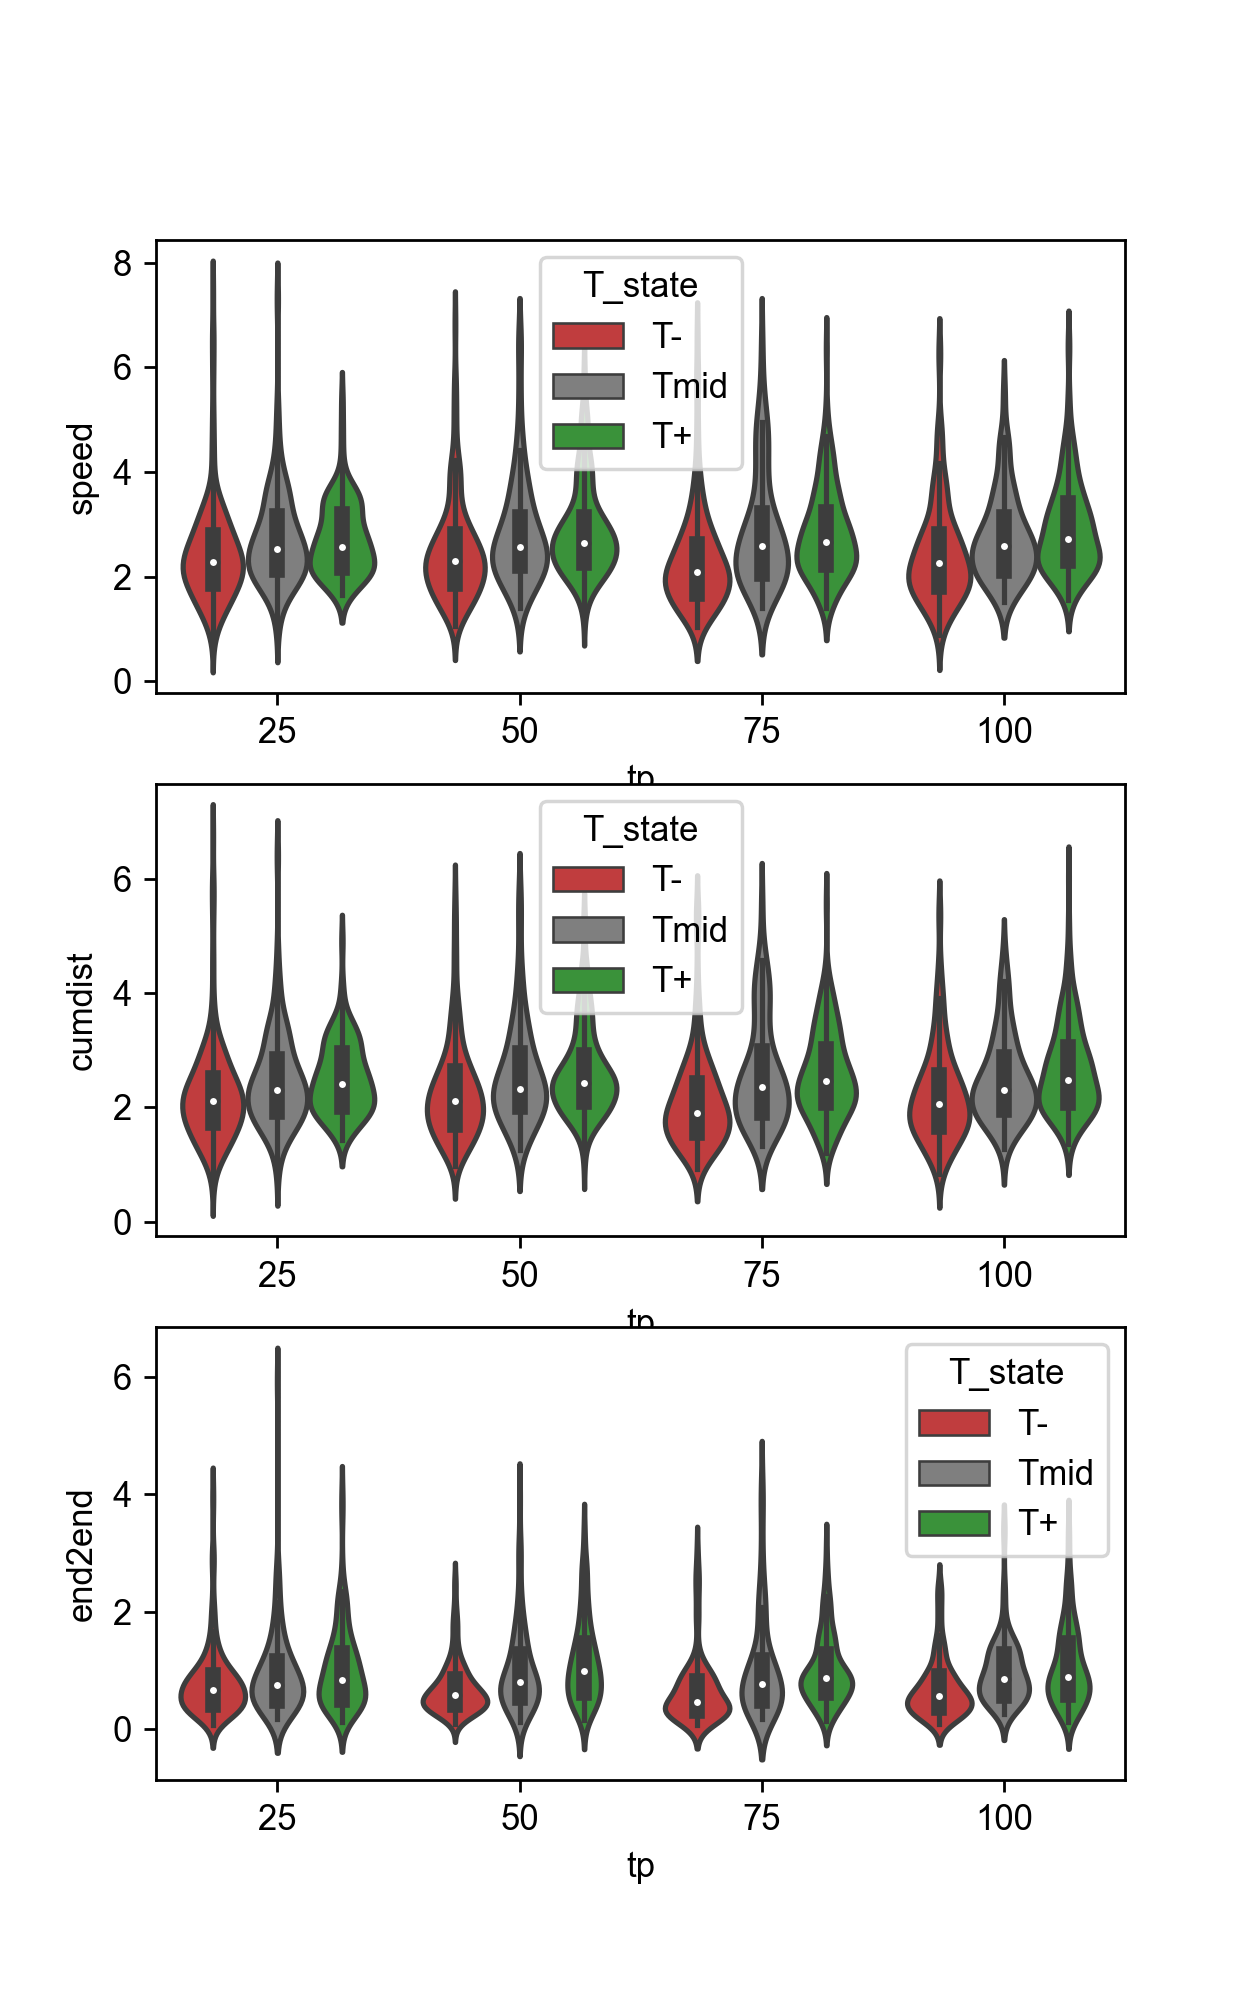

meta NOT subset; don't know how to subset; dropped


In [43]:
colors = [
    'tab:red',
     'tab:gray', #comment out if not wanted
    'tab:green'
]*4
hue_order = [
    'T-',
     'Tmid', #comment out if not wanted
    'T+'
]

fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(5,8))
#sns.barplot(data=df_tracks_tps, x='tp', y='speed', hue='T_state', errorbar='sd', palette=colors, ax=ax[0], hue_order=hue_order)
#sns.barplot(data=df_tracks_tps, x='tp', y='cumdist', hue='T_state', errorbar='sd', palette=colors, ax=ax[1], hue_order=hue_order)
#sns.barplot(data=df_tracks_tps, x='tp', y='end2end', hue='T_state', errorbar='sd', palette=colors, ax=ax[2], hue_order=hue_order)

sns.violinplot(data=df_tracks_tps, x='tp', y='speed', hue='T_state', errorbar='sd', palette=colors, ax=ax[0], hue_order=hue_order)
sns.violinplot(data=df_tracks_tps, x='tp', y='cumdist', hue='T_state', errorbar='sd', palette=colors, ax=ax[1], hue_order=hue_order)
sns.violinplot(data=df_tracks_tps, x='tp', y='end2end', hue='T_state', errorbar='sd', palette=colors, ax=ax[2], hue_order=hue_order)


fig.savefig('Tpos_vsTneg3.pdf')

### T positive activation

If cell i is positive, what fraction of the 5 closest cells will be positive after 10 timepoints? Compute number of positive cells at tp+10 - number of positive cells at tp. How does it change in funcrion of tp?

In [87]:
from scipy.ndimage import gaussian_filter1d

track_ids = df_tracks['cell_id'].values

In [88]:
track_ids


array([   0,    1,    2, ..., 1976, 1977, 1978], dtype=int64)

In [89]:
df_cells

,id,n_links,mean-ch1,mean-ch2,x,y,z,t,r,track_id,track_n_spots,cell_id,speed,T+
0,0,1,156.372240,641.495268,158.326385,166.450867,35.1136,0,3.673884,0,31,0,2.259575,True
1,1,1,171.816382,848.591359,162.717006,174.964568,31.1066,0,3.925749,1004,21,1,4.336335,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47149,47268,1,201.388730,397.867240,206.900116,212.074247,24.3908,199,3.770066,947,364,1934,NaN,True
47150,47270,1,158.854149,743.719195,260.449077,315.489789,87.4950,199,3.967094,985,345,1953,NaN,True


In [90]:
df_cells['ch1_filt'] = 0.
df_cells['T+_filt'] = False
for t in track_ids:
    df_cell = df_cells[df_cells.cell_id==t]
    ch1_filt = gaussian_filter1d(df_cell['mean-ch1'].values,1.5)
    df_cells.loc[df_cells.cell_id==t,'ch1_filt'] = ch1_filt
    df_cells.loc[df_cells.cell_id==t,'T+_filt'] = ch1_filt>150

In [91]:
df_cells

,id,n_links,mean-ch1,mean-ch2,x,y,z,t,r,track_id,track_n_spots,cell_id,speed,T+,ch1_filt,T+_filt
0,0,1,156.372240,641.495268,158.326385,166.450867,35.1136,0,3.673884,0,31,0,2.259575,True,158.174596,True
1,1,1,171.816382,848.591359,162.717006,174.964568,31.1066,0,3.925749,1004,21,1,4.336335,True,171.191897,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47149,47268,1,201.388730,397.867240,206.900116,212.074247,24.3908,199,3.770066,947,364,1934,NaN,True,215.946153,True
47150,47270,1,158.854149,743.719195,260.449077,315.489789,87.4950,199,3.967094,985,345,1953,NaN,True,157.271704,True


<IPython.core.display.Javascript object>


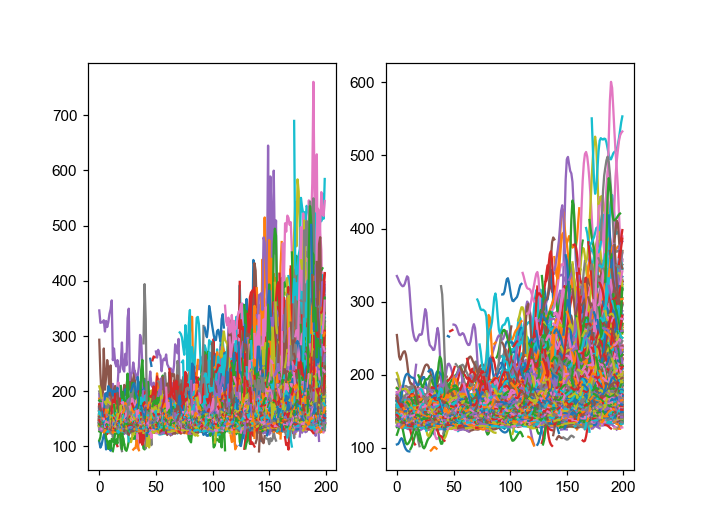

In [92]:
fig, ax = plt.subplots(1,2)

for t in track_ids:
    df_cell = df_cells[df_cells.cell_id==t]
    ax[0].plot(df_cell.t,df_cell['mean-ch1'].values)
    ax[1].plot(df_cell.t,df_cell['ch1_filt'].values)

<IPython.core.display.Javascript object>


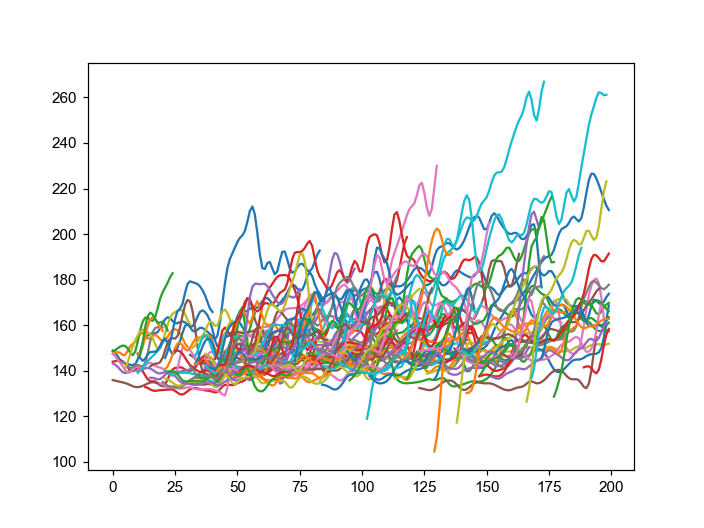

In [93]:
plt.figure()
t_thr = 150

tracks_switch = []
i = 0
for t in track_ids:
    df_cell = df_cells[df_cells.cell_id==t]
    if len(df_cell)>10:
        if df_cell.ch1_filt.values[-1]>t_thr:
            if df_cell.ch1_filt.values[0]<t_thr:
                plt.plot(df_cell.t,df_cell.ch1_filt.values)
                tracks_switch.append(df_cell.cell_id.values[0])
                i+=1

In [26]:
from sklearn.neighbors import NearestNeighbors
plt.figure()
t_thr = 150

i = 0
for tsw in tracks_switch:
    df_cell = df_cells[df_cells.cell_id==tsw]
    
    # find last tp that cell is negative
    last_tp = df_cell[df_cell['T+_filt']==False].iloc[-1].t
    my_pos = df_cell[df_cell.t==last_tp][['x','y','z']].to_numpy()
    
    # compute distances to all other cells
    df_cells_tp = df_cells[df_cells.t==last_tp]
    others_pos = df_cells_tp[['x','y','z']].to_numpy()
    others_ids = df_cells_tp.cell_id.values
    
    nbrs = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(others_pos)
    distances, indices = nbrs.kneighbors(my_pos)
    # remove the cell itself
    indices = indices[1:]
    close_ids = others_ids[indices]
    
    
    
    
    


210